# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 9 - Support Vector Machines</font>

****** Este Jupyter Notebook foi atualizado para a versão 3.6.1. da Linguagem Python em 05/07/2017 ******

http://scikit-learn.org/stable/modules/svm.html

## SVC

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
# Extraindo os 2 primeiros atributos para variáveis preditoras (x) e a variável target (y)
X = iris.data[:, :2] 
y = iris.target

In [4]:
#X, y = iris.data, iris.target

In [5]:
modelo = SVC( kernel = 'rbf', C = 1.0, gamma = 0.7, random_state = 101)

In [6]:
scores = cross_val_score(modelo, X, y, cv = 20)

In [7]:
modelo.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
print ('Acurácia: %0.3f' % np.mean( scores))

Acurácia: 0.819


In [9]:
# Imprimindo os vetores de suporte
print (modelo.support_)

[  1   8  12  14  18  20  25  31  36  41  45  50  51  52  54  55  56  57
  58  59  60  61  62  63  65  66  67  68  70  71  72  73  74  75  76  77
  78  82  83  84  85  86  87  88  91  92  93  95  96  97  98  99 100 101
 103 104 106 108 110 111 112 113 114 115 116 118 119 121 123 126 127 128
 131 132 133 134 136 137 138 140 142 145 146 147 148 149]


In [10]:
# Criando um meshgrid para o Plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

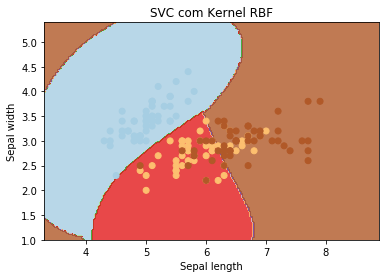

In [11]:
# Plot
plt.subplot(1, 1, 1)
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC com Kernel RBF')
plt.show()

## SVR

In [12]:
import numpy as np 
from sklearn.datasets import load_boston 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [13]:
scaler = StandardScaler() 

In [14]:
boston = load_boston() 

In [15]:
shuffled = np.random.permutation(boston.target.size) 

In [16]:
X_b = scaler.fit_transform(boston.data[ shuffled,:]) 
y_b = boston.target[shuffled]

In [17]:
modelo = SVR(kernel = 'rbf', C = 20.0, gamma = 0.001, epsilon = 1.0) 

In [18]:
scores = cross_val_score(modelo, X_b, y_b, cv = 20) 

In [19]:
print ('Score: %0.3f' % abs(np.mean(scores)))

Score: 0.642


## Gerando as Margens com SVC

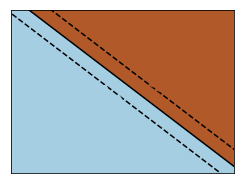

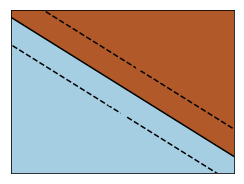

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Criando 40 pontos de dados
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
fignum = 1

# Criação e Fit do Modelo
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel = 'linear', C = penalty)
    clf.fit(X, Y)

    # Obtendo o hiperplano
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # Plot das margens que passam sobre os vetores de suporte
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # Plot da linha, dos pontos e dos vetores mais próximos
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Color Plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

## Kernels

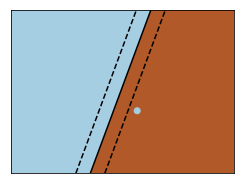

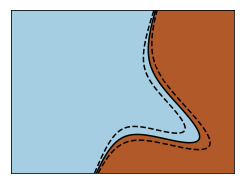

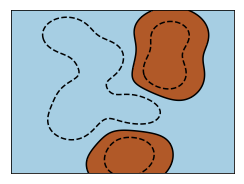

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Atributos e variável target
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

fignum = 1

# Modelo e Fit com 3 kernels
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel = kernel, gamma = 2)
    clf.fit(X, Y)

    # Plot da linha com vetores de suporte mais próximos
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Color Plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
    
plt.show()

## Kernel RBF (Não Linear) e Parâmetros C e Gamma

O parâmetro C é um trade off (escolha) entre a incorreta classificação de exemplos de treinamento contra a simplicidade da superfície de decisão. Um C baixo torna a superfície de decisão suave, enquanto um C alto visa classificar todos os exemplos de treinamento corretamente, dando ao modelo liberdade para selecionar mais amostras como vetores de suporte.

O parâmetro gamma define qual é a influência de um único exemplo de treinamento. É um coeficiente de kernel para 'rbf', 'poli' e 'sigmóide'. Se gamma for definido como 'auto' então 1/n_features serão usados. Valores baixos significam 'alta variância' e maior influência do vetor de suporte e valores altos significam 'baixa variância' e os vetores de suporte não possuem grande influência no processo de classificação. Os parâmetros gama podem ser vistos como o inverso do raio de influência de amostras selecionadas pelo modelo como vetores de suporte.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [2]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [3]:
# Dataset
iris = load_iris()
X = iris.data
y = iris.target
X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

In [18]:
# Normalização
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

In [29]:
# Treinamento com Grid Search
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("Os melhores parâmetros são %s com score de %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

Os melhores parâmetros são {'C': 1.0, 'gamma': 0.10000000000000001} com score de 0.97


In [31]:
classifiers

[(0.01, 0.1, SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 (0.01, 1, SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 (0.01, 10.0, SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 (1, 0.1, SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 (1, 1, SVC(C=1, cache_size=200,

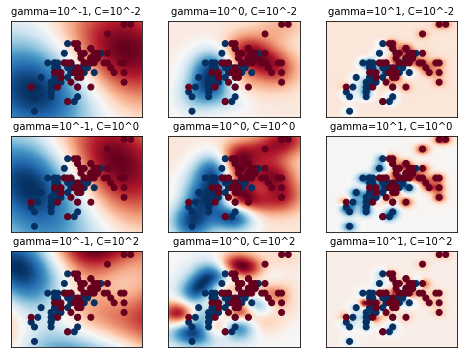

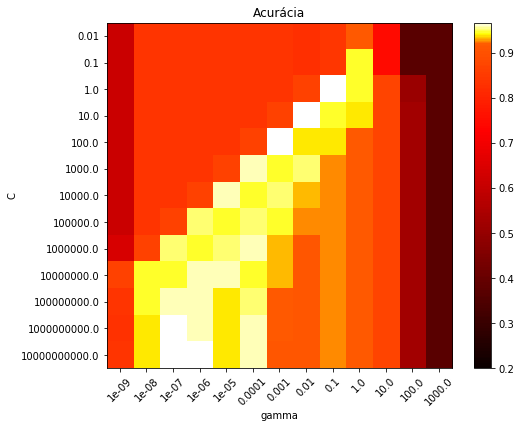

In [32]:
# Visualização
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    
    # Avalia a função de decisão em um grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Visualiza a função de decisão
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

# Heatmaps

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Acurácia')
plt.show()

## Usando SVM para categorizar pixels 28x28 em dígitos com MNIST dataset

http://yann.lecun.com/exdb/mnist/

In [33]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)


def main():
    data = get_data()

    # Classificador
    from sklearn.svm import SVC
    clf = SVC(probability = False, kernel = "rbf", C = 2.8, gamma = .0073)

    print("Começando o processamento. Isso vai demorar! Pegue um café!!\n")

    # Obtendo dados para o experimento
    examples = len(data['train']['X'])
    clf.fit(data['train']['X'][:examples], data['train']['y'][:examples])

    analyze(clf, data)


def analyze(clf, data):

    # Confusion matrix
    from sklearn import metrics
    predicted = clf.predict(data['test']['X'])
    print("Confusion matrix:\n%s" %
          metrics.confusion_matrix(data['test']['y'],
                                   predicted))
    print("Acurácia: %0.4f" % metrics.accuracy_score(data['test']['y'],
                                                     predicted))

    # Imprime
    try_id = 1
    out = clf.predict(data['test']['X'][try_id])  
    print("Previsão: %s" % out)
    size = int(len(data['test']['X'][try_id])**(0.5))
    view_image(data['test']['X'][try_id].reshape((size, size)),
               data['test']['y'][try_id])


def view_image(image, label=""):
   
    # Visualiza uma única imagem
    from matplotlib.pyplot import show, imshow, cm
    print("Label: %s" % label)
    imshow(image, cmap=cm.gray)
    show()


def get_data():
 
    simple = False
    if simple:  
        from sklearn.datasets import load_digits
        from sklearn.utils import shuffle
        digits = load_digits()
        x = [np.array(el).flatten() for el in digits.images]
        y = digits.target

       
        x = x/255.0*2 - 1
        x, y = shuffle(x, y, random_state=0)

        from sklearn.cross_validation import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                            test_size = 0.33,
                                                            random_state=42)
        data = {'train': {'X': x_train,
                          'y': y_train},
                'test': {'X': x_test,
                         'y': y_test}}
    else:  
        from sklearn.datasets import fetch_mldata
        from sklearn.utils import shuffle
        mnist = fetch_mldata('MNIST original')

        x = mnist.data
        y = mnist.target

        # Normaliza os dados com escala entre [-1, 1] 
        x = x/255.0*2 - 1

        x, y = shuffle(x, y, random_state=0)

        from sklearn.cross_validation import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                            test_size=0.33,
                                                            random_state=42)
        data = {'train': {'X': x_train,
                          'y': y_train},
                'test': {'X': x_test,
                         'y': y_test}}
    return data


if __name__ == '__main__':
    main()

Começando o processamento. Isso vai demorar! Pegue um café!!

Confusion matrix:
[[2258    1    4    1    2    2    3    1    4    2]
 [   1 2566    9    1    1    0    0    7    3    0]
 [   4    1 2280    5    4    0    1    9    8    2]
 [   0    0   14 2304    1   13    0    6    8    2]
 [   2    2    2    0 2183    0    7    5    0   10]
 [   4    0    0   16    3 2026   12    1    4    3]
 [   7    5    3    0    5    2 2245    0    4    0]
 [   1    6   11    2    5    1    0 2373    5   13]
 [   3    9    4    9    4   10    2    3 2166    5]
 [   3    2    2    6   19    6    0   12   10 2329]]
Acurácia: 0.9840


ValueError: Expected 2D array, got 1D array instead:
array=[-1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -0.89803922 -1.         -0.81960784 -0.96862745
  0.6         0.98431373  0.69411765  0.89019608  0.6         0.09803922
 -0.94509804 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -0.85098039 -0.55294118  0.62352941  0.3254902
  0.83529412  0.00392157  0.98431373  0.97647059  0.97647059  0.97647059
  0.98431373  0.68627451  0.16862745 -0.16078431 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -0.85098039  0.09803922  0.97647059
  0.98431373  0.97647059  0.97647059  0.97647059  0.98431373  0.97647059
  0.97647059  0.97647059  0.98431373  0.97647059  0.97647059  0.97647059
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.16078431  0.97647059  0.97647059  0.98431373  0.97647059  0.97647059
  0.97647059  0.98431373  0.97647059  0.28627451  0.49019608  0.98431373
  0.97647059  0.97647059  0.97647059 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.8745098   0.69411765  0.98431373  0.98431373  1.
  0.98431373  0.98431373  0.00392157 -0.10588235 -0.30980392 -1.         -1.
 -1.         -0.40392157  0.74901961  0.98431373 -0.50588235 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -0.77254902  0.97647059  0.97647059  0.97647059
  0.98431373  0.78039216  0.82745098 -0.82745098 -1.         -1.         -1.
 -1.         -1.         -1.          0.54509804  0.97647059 -0.11372549
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.77254902  0.97647059
  0.97647059  0.97647059  0.61568627 -0.06666667 -0.70980392 -1.         -1.
 -1.         -1.         -1.         -1.         -1.          0.54509804
  0.97647059  0.25490196 -0.48235294 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.96862745  0.39607843  0.97647059  0.97647059 -0.11372549 -1.         -1.
 -1.         -1.         -1.         -1.         -0.6        -0.10588235
 -0.11372549  0.74117647  0.97647059  0.98431373  0.1372549  -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -0.55294118  0.98431373  0.98431373  0.99215686
  0.78823529  0.10588235  0.10588235  0.10588235  0.10588235  0.39607843
  0.98431373  0.99215686  0.98431373  0.98431373  0.98431373  0.10588235
 -0.23921569 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -0.85098039
  0.49019608  0.97647059  0.98431373  0.97647059  0.97647059  0.97647059
  0.98431373  0.97647059  0.97647059  0.97647059  0.98431373  0.97647059
  0.97647059  0.97647059  0.30196078 -0.05098039 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -0.85098039  0.81176471  0.98431373  0.97647059
  0.97647059  0.97647059  0.98431373  0.97647059  0.97647059  0.97647059
  0.98431373  0.97647059  0.97647059  0.97647059  0.89019608 -0.34117647
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -0.01176471
  0.95294118  0.98431373  0.97647059  0.97647059  0.97647059  0.98431373
  0.97647059  0.97647059  0.97647059  0.89019608  0.09019608  0.38823529
  0.97647059  0.98431373  0.73333333 -0.80392157 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -0.74901961  0.79607843  0.98431373  0.99215686  0.98431373  0.91372549
  0.37254902  0.38039216 -0.01960784 -0.30196078  0.27843137  0.18431373
 -1.         -1.         -1.          0.99215686  0.98431373 -0.56078431
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -0.55294118  0.97647059  0.97647059
  0.98431373  0.09019608 -0.56078431 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.          0.78823529
  0.97647059  0.01960784 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -0.55294118
  0.97647059  0.97647059  0.81176471 -0.85098039 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
  0.10588235  0.97647059  0.83529412 -0.82745098 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.55294118  0.97647059  0.97647059  0.96078431 -0.41176471 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -0.6         0.89019608  0.97647059  0.38823529 -0.97647059 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.01176471  0.96078431  0.99215686  0.59215686 -0.08235294
 -0.8745098  -1.         -1.         -1.         -1.         -1.
 -0.64705882  0.10588235  0.89019608  0.99215686  0.9372549   0.86666667
 -0.80392157 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.          0.76470588
  0.98431373  0.97647059  0.97647059  0.00392157 -0.05882353  0.12941176
 -0.55294118  0.23137255  0.3254902   0.76470588  0.97647059  0.97647059
  0.98431373  0.34117647 -0.70196078 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.21568627  0.98431373  0.97647059  0.97647059  0.97647059
  0.98431373  0.97647059  0.97647059  0.97647059  0.98431373  0.97647059
  0.97647059  0.97647059  0.81176471 -0.85098039 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.28627451  0.68627451
  0.97647059  0.97647059  0.98431373  0.97647059  0.97647059  0.97647059
  0.59215686  0.18431373 -0.09019608 -0.68627451 -0.80392157 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>